In [1]:
# Importing the required libraries 

import pandas as pd # for the analysis and data processing
import numpy as np # for the arrays
import seaborn as sns # for visualization
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
# Reading the modified dataset
CabData = pd.read_csv(r"C:\Users\Hanno\Documents\DataSets-main\CabData.csv")

In [3]:
# 1 Understanding the data

In [4]:
# getting the datasets Information 
CabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  object 
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(1), object(3)
memory usage: 19.2+ MB


In [5]:
# get the variables name the dataset 
CabData.columns

Index(['Transaction ID', 'Date of Travel', 'Company', 'City', 'KM Travelled',
       'Price Charged', 'Cost of Trip'],
      dtype='object')

In [6]:
# variables types
CabData.dtypes

Transaction ID      int64
Date of Travel     object
Company            object
City               object
KM Travelled      float64
Price Charged     float64
Cost of Trip      float64
dtype: object

In [7]:
# the number of rows and columns
CabData.shape

(359392, 7)

In [8]:
# view some statistical details 
CabData.describe()

,Transaction ID,KM Travelled,Price Charged,Cost of Trip
count,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113
std,1.268058e+05,12.233526,274.378911,157.993667
min,1.000001e+07,1.900000,15.600000,19.000000
25%,1.011081e+07,12.000000,206.437500,151.200000
50%,1.022104e+07,22.440000,386.360000,282.480000
75%,1.033094e+07,32.960000,583.660000,413.680000
max,1.044011e+07,48.000000,2048.030000,691.200000


In [9]:
# 2 Cleaning the data

In [10]:
# check for null values 
CabData.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

In [11]:
# converting the date from object to datetime format for CabData
CabData['Date of Travel'] = pd.to_datetime(CabData['Date of Travel'])
CabData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [12]:
#  extracting month from date 
CabData['Month'] = CabData['Date of Travel'].dt.month
CabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,1
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,1
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30,1
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23,1
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70,1


In [13]:
# extracting year from date 
CabData['Year'] = CabData['Date of Travel'].dt.year
CabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,1,2016
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,1,2016
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30,1,2016
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23,1,2016
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70,1,2016


In [14]:
# adding a column called profit to look for the profit for each cab from the year of 2016 to 2018 
CabData ['Profit'] = CabData['Price Charged'] - CabData['Cost of Trip']
CabData.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Profit
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,1,2016,27.57
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,1,2016,98.01
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30,1,2016,191.76
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23,1,2016,192.20
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70,1,2016,14.34


In [15]:
# 3 The analysis 

In [16]:
CabData.groupby('Year') 

In [17]:
CabData.groupby(['Year', 'Company'])

In [18]:
# Calculating the profit for the two cab companies from 2016 to 2018
CabData.groupby(['Year', 'Company']).sum()['Profit'].reset_index()


,Year,Company,Profit
0,2016,Pink Cab,1713511.47
1,2016,Yellow Cab,13926996.40
2,2017,Pink Cab,2033655.48
3,2017,Yellow Cab,16575977.40
4,2018,Pink Cab,1560161.80
5,2018,Yellow Cab,13517398.79


In [19]:
# for better look 
CabData.groupby(['Year', 'Company']).sum()['Profit']

Year  Company   
2016  Pink Cab       1713511.47
      Yellow Cab    13926996.40
2017  Pink Cab       2033655.48
      Yellow Cab    16575977.40
2018  Pink Cab       1560161.80
      Yellow Cab    13517398.79
Name: Profit, dtype: float64

In [20]:
# 4 Visualization

In [21]:
CabData.head(10)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Month,Year,Profit
0,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,1,2016,27.57
1,10000029,2016-01-02,Pink Cab,BOSTON MA,21.34,324.21,226.20,1,2016,98.01
2,10000030,2016-01-02,Pink Cab,BOSTON MA,41.30,646.06,454.30,1,2016,191.76
3,10000041,2016-01-02,Pink Cab,CHICAGO IL,35.02,598.43,406.23,1,2016,192.20
4,10000045,2016-01-02,Pink Cab,CHICAGO IL,3.24,48.04,33.70,1,2016,14.34
5,10000048,2016-01-02,Pink Cab,CHICAGO IL,14.04,223.60,140.40,1,2016,83.20
6,10000049,2016-01-02,Pink Cab,CHICAGO IL,27.82,451.22,303.24,1,2016,147.98
7,10000050,2016-01-02,Pink Cab,CHICAGO IL,10.20,165.77,116.28,1,2016,49.49
8,10000055,2016-01-02,Pink Cab,CHICAGO IL,16.95,249.42,200.01,1,2016,49.41
9,10000060,2016-01-02,Pink Cab,CHICAGO IL,35.34,500.22,395.81,1,2016,104.41


C:\Users\Hanno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


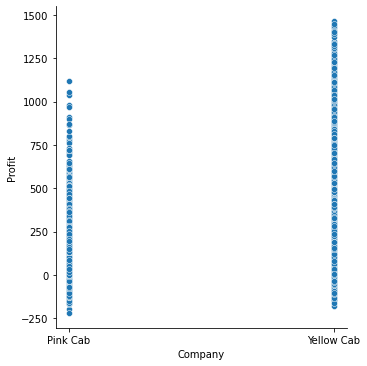

In [22]:
sns.relplot('Company', 'Profit', data=CabData)


C:\Users\Hanno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


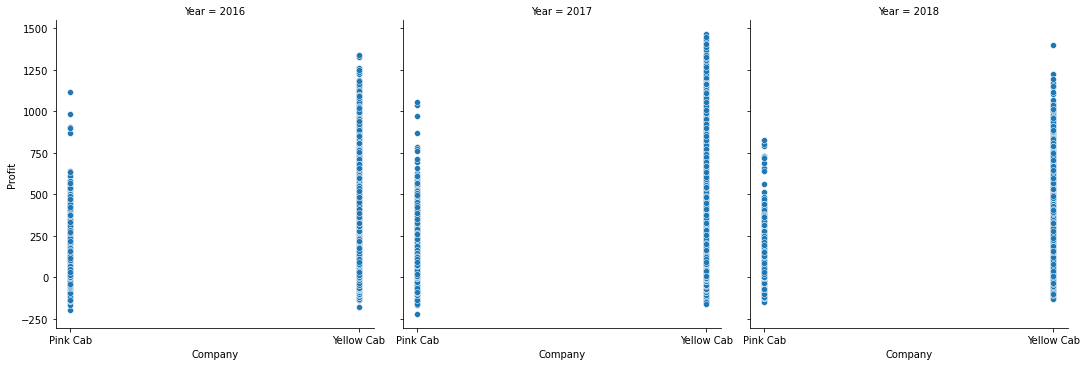

In [23]:
sns.relplot('Company', 'Profit', data=CabData, col='Year')


C:\Users\Hanno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


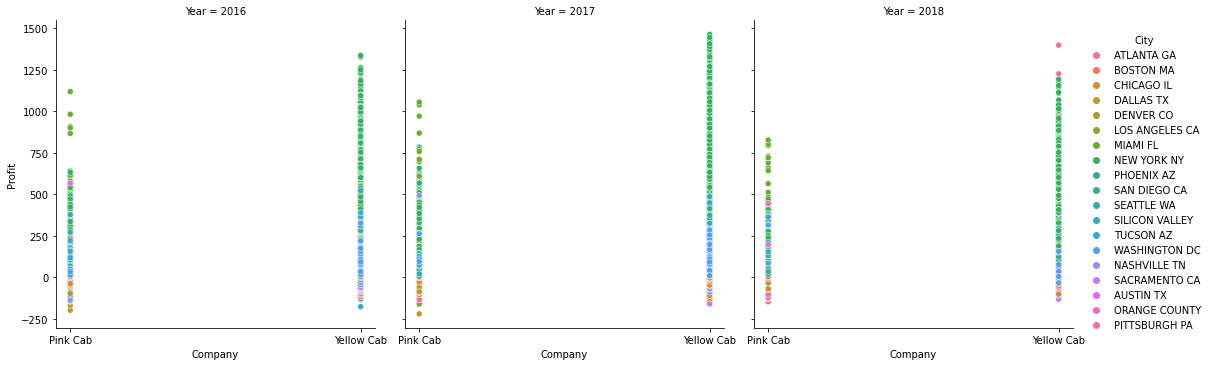

In [24]:
sns.relplot('Company', 'Profit', data=CabData, col='Year', hue= 'City')


C:\Users\Hanno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


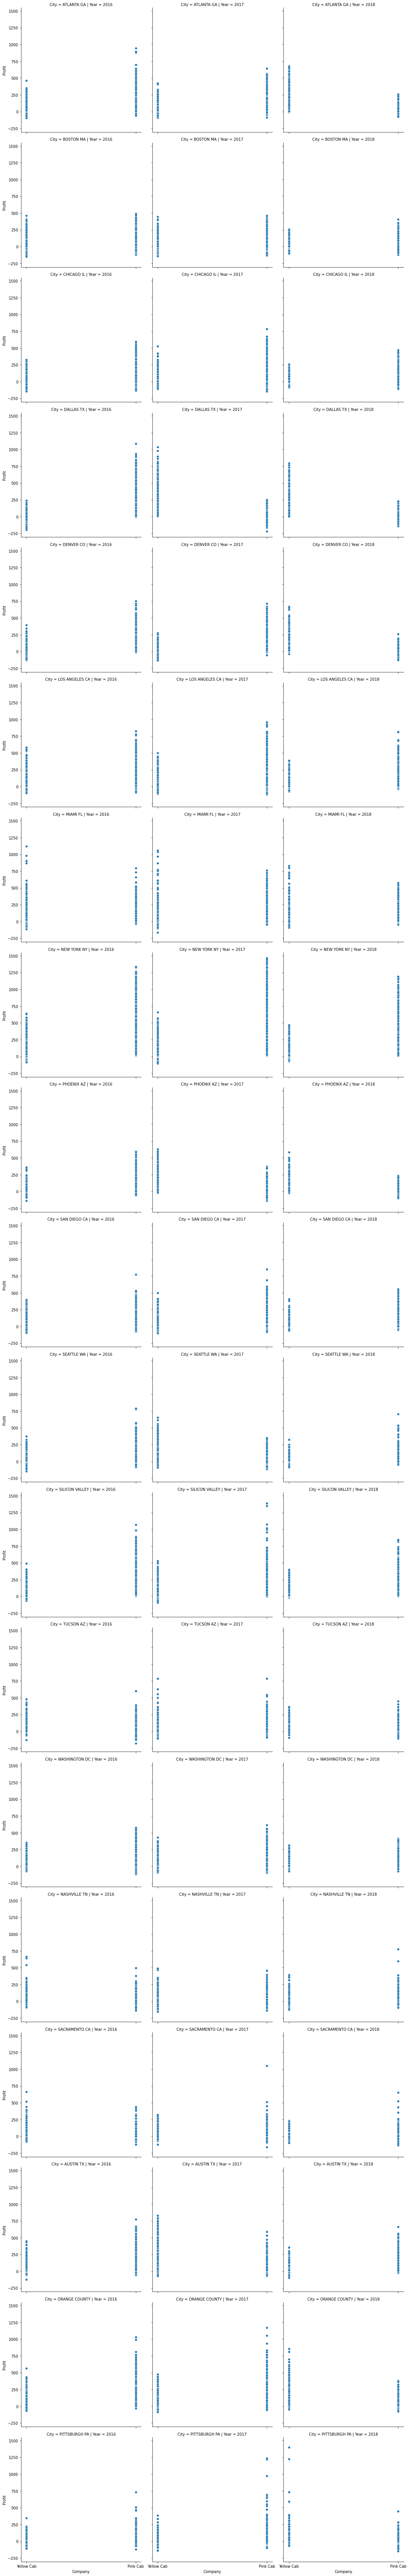

In [25]:
sns.relplot('Company', 'Profit', data=CabData, col='Year', row= 'City')


In [26]:
CabData.shape

(359392, 10)

<AxesSubplot:xlabel='Company', ylabel='Profit'>

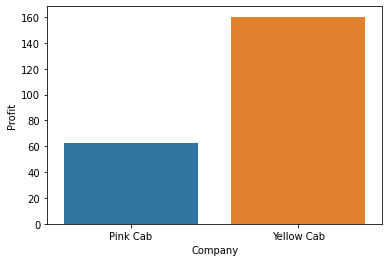

In [27]:
sns.barplot(x= 'Company', y ='Profit', ci=None, data=CabData)